In [ ]:
import pandas as pd
import os

csv_folder = '/content/drive/MyDrive/sentiments_outputs'
dfs = []
problematic_batches = []

# Step 1: Read CSVs
for i in range(1, 11):
    file_path = os.path.join(csv_folder, f'sentiment_analysis_batch_{i}.csv')
    try:
        df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
        dfs.append(df)
        print(f"Loaded batch {i} with shape {df.shape}")
    except Exception as e:
        print(f"Initial read failed for batch {i}: {e}")
        dfs.append(None)
        problematic_batches.append(i)

# Step 2: Retry problematic batches with engine='python'
for i in problematic_batches:
    file_path = os.path.join(csv_folder, f'sentiment_analysis_batch_{i}.csv')
    try:
        df = pd.read_csv(file_path, encoding='utf-8', engine='python', on_bad_lines='skip')
        dfs[i - 1] = df
        print(f"Recovered batch {i} with shape {df.shape}")
    except Exception as e:
        print(f"Still failed for batch {i}: {e}")
        raise RuntimeError(f"Batch {i} cannot be recovered")

# Step 3: Concatenate all sentiment DataFrames
sentiment_df = pd.concat(dfs, ignore_index=True)

# Step 4: Load topics DataFrame
topics_df = pd.read_pickle('/content/drive/MyDrive/Copy of data_with_topics.pkl')

# Step 5: Merge on 'trafilatura_title'
# We'll use a left merge to preserve all rows in topics_df
merged_df = topics_df.merge(
    sentiment_df[['trafilatura_title', 'overall_sentiment']],
    on='trafilatura_title',
    how='left'
)

# Step 6: Fill missing sentiment values with 'neutral'
merged_df['overall_sentiment'] = merged_df['overall_sentiment'].fillna('neutral')

# Done: Preview result
print("Merged DataFrame with sentiment column added:")
print(merged_df[['trafilatura_title', 'overall_sentiment']].head())


Loaded batch 1 with shape (18000, 6)
Loaded batch 2 with shape (18439, 6)
Initial read failed for batch 3: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

Loaded batch 4 with shape (18439, 6)
Loaded batch 5 with shape (18439, 6)
Initial read failed for batch 6: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

Loaded batch 7 with shape (18439, 6)
Initial read failed for batch 8: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

Loaded batch 9 with shape (18439, 6)
Initial read failed for batch 10: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

Recovered batch 3 with shape (18438, 6)
Recovered batch 6 with shape (18440, 6)
Recovered batch 8 with shape (18441, 6)
Recovered batch 10 with shape (18438, 6)
Merged DataFrame with sentiment column added:
                                   trafilatura_title overall_sentiment
0  Infogain

In [ ]:
import pandas as pd

# Define the topic mapping as a DataFrame
topic_mapping = pd.DataFrame({
    'topic': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Top Words': [
        'digital, cloud, research, solutions, global, industry',
        'market, stocks, stock, company, trading, investment',
        'republic, south, newswires, india, email, united',
        'public, said, community, music, radio, schedule',
        'services, products, entertainment, consumer, policy, lg',
        'ago, hours, said, weather, video, stories',
        'generative, models, chatgpt, users, tools, learning',
        'share, price, laptop, market, india, 2024',
        'market, gray, group, 2022, prnewswire, release',
        'best, google, 2024, tech, chatgpt, home'
    ],
    'Suggested Industry': [
        'Digital Transformation & Cloud Computing',
        'Financial Markets & Investing',
        'International News & Communication',
        'Public Media & Broadcasting',
        'Consumer Electronics & Entertainment',
        'Digital News & Social Trends',
        'Generative AI & User Tools',
        'Consumer Tech & Hardware Sales',
        'Corporate Communications & PR',
        'Consumer Tech & AI'
    ],
    'Rationale': [
        'Focus on cloud, digital solutions, and global industry relevance.',
        'Direct references to market activity, stocks, and trading behavior.',
        'Keywords hint at global news distribution, email usage, and country-specific mentions.',
        'References to radio, music, and public schedules point to broadcast media and community-centered content.',
        'Combination of product/service terms and a consumer brand (LG) links to entertainment and consumer goods.',
        'Language of reporting (“said,” “stories”) plus video and weather, indicating real-time digital news updates.',
        'Generative models, ChatGPT, and tools for learning suggest the generative AI and digital productivity tools industry.',
        'Mix of share price, laptop, and Indian market context suggests tech hardware and consumer electronics.',
        'References to PRNewswire and market-focused group releases indicate public relations and corporate messaging.',
        'Major tech brands and AI tools combined with “home” suggest consumer tech and AI-driven home solutions.'
    ]
})

# Ensure topic column is integer for accurate merge
merged_df['topic'] = merged_df['topic'].astype(int)

# Merge on Topic column
merged_df = merged_df.merge(topic_mapping, on='topic', how='left')


In [ ]:
merged_df.head()

,url,date,language,title,text,cleaned_text,year,month,yearmonth,is_relevant,source_domain,trafilatura_text,trafilatura_title,topic,overall_sentiment,Top Words,Suggested Industry,Rationale
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,en,Infogain AI Business Solutions Now Available i...,\n\nInfogain AI Business Solutions Now Availab...,Infogain AI Business Solutions Now Available i...,2023,5,2023-05,True,businessnewsthisweek.com,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...,6,Positive,"generative, models, chatgpt, users, tools, lea...",Generative AI & User Tools,"Generative models, ChatGPT, and tools for lear..."
1,https://allafrica.com/stories/202504250184.html,2025-04-25,en,Africa: AI Policies in Africa - Lessons From G...,\nAfrica: AI Policies in Africa - Lessons From...,Africa: AI Policies in Africa - Lessons From G...,2025,4,2025-04,True,allafrica.com,Africa: AI Policies in Africa - Lessons From G...,Africa: AI Policies in Africa,0,Neutral,"digital, cloud, research, solutions, global, i...",Digital Transformation & Cloud Computing,"Focus on cloud, digital solutions, and global ..."
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,en,Yang Lan interviews academics on AI developmen...,\nYang Lan interviews academics on AI developm...,Yang Lan interviews academics on AI developmen...,2023,7,2023-07,True,asiatimes.com,Yang Lan interviews academics on AI developmen...,Yang Lan interviews academics on AI development,3,Neutral,"public, said, community, music, radio, schedule",Public Media & Broadcasting,"References to radio, music, and public schedul..."
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,en,Commerce Nominee Promises Increased Domestic A...,\nCommerce Nominee Promises Increased Domestic...,Commerce Nominee Promises Increased Domestic A...,2025,2,2025-02,True,cdn.meritalk.com,Commerce Nominee Promises Increased Domestic A...,Commerce Nominee Promises Increased Domestic A...,9,Neutral,"best, google, 2024, tech, chatgpt, home",Consumer Tech & AI,Major tech brands and AI tools combined with “...
4,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,en,Commerce Nominee Promises Increased Domestic A...,\nCommerce Nominee Promises Increased Domestic...,Commerce Nominee Promises Increased Domestic A...,2025,2,2025-02,True,cdn.meritalk.com,Commerce Nominee Promises Increased Domestic A...,Commerce Nominee Promises Increased Domestic A...,9,Neutral,"best, google, 2024, tech, chatgpt, home",Consumer Tech & AI,Major tech brands and AI tools combined with “...


In [ ]:
df = merged_df

# Visualizations

In [ ]:
!pip install adjustText


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#1️⃣ Industry Impact Map (Bar Chart)
### X-axis: Industry
### Y-axis: Composite AI Impact Score (we’ll use frequency × sentiment)
### Color: Sentiment




<ipython-input-7-dde4ead06586>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_stats.sort_values('impact_score', ascending=False),


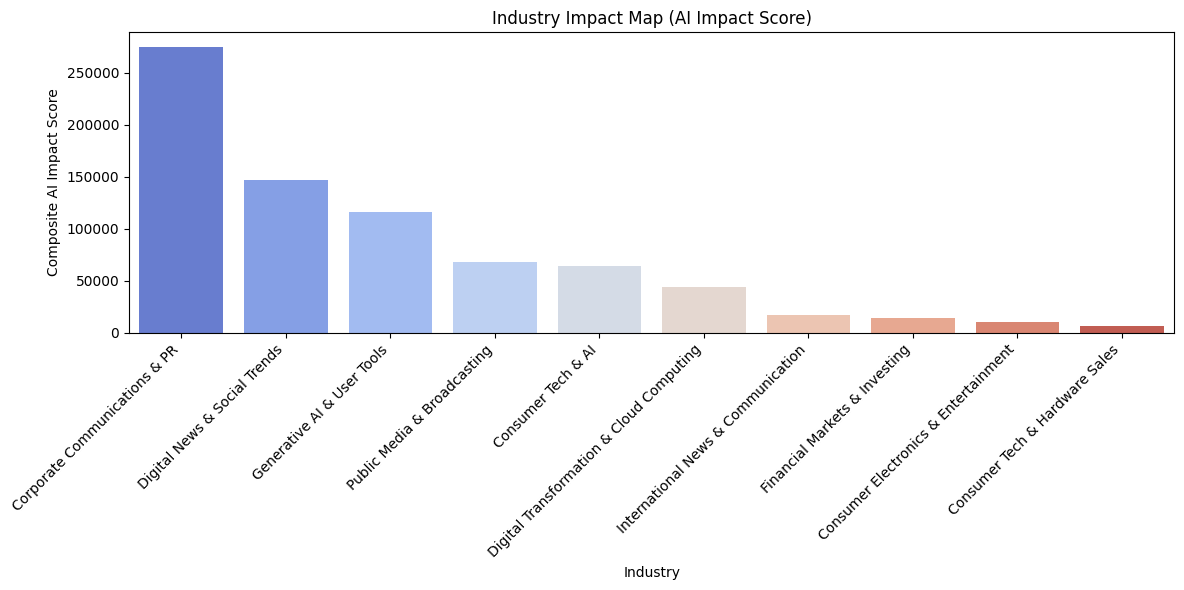

In [ ]:
# Encode sentiment to numerical scores
sentiment_map = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['sentiment_score'] = df['overall_sentiment'].map(sentiment_map)

# Compute frequency and avg sentiment
industry_stats = df.groupby('Suggested Industry').agg(
    frequency=('url', 'count'),
    avg_sentiment=('sentiment_score', 'mean')
).reset_index()

# Composite score = frequency * avg sentiment
industry_stats['impact_score'] = industry_stats['frequency'] * industry_stats['avg_sentiment']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=industry_stats.sort_values('impact_score', ascending=False),
            x='Suggested Industry', y='impact_score', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Industry Impact Map (AI Impact Score)')
plt.ylabel('Composite AI Impact Score')
plt.xlabel('Industry')
plt.tight_layout()
plt.show()


# 2️⃣ Industry-by-Topic Heatmap
### Rows: Suggested Industry
### Columns: LDA Topic
### Values: Frequency of that topic in industry

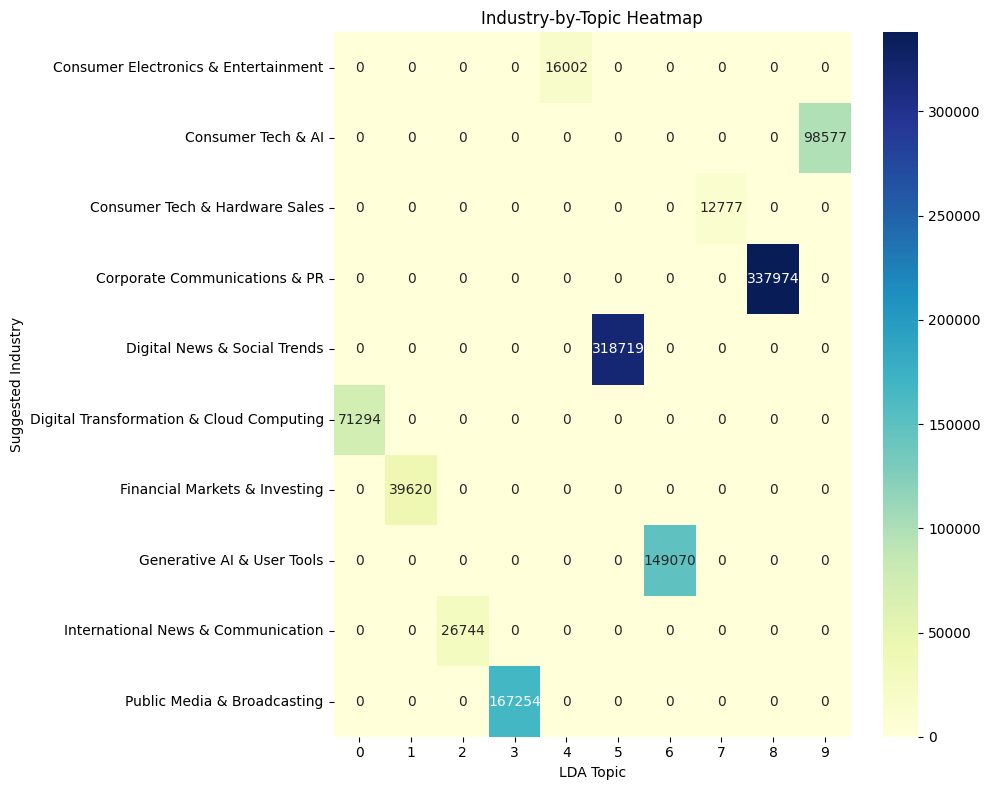

In [ ]:
heatmap_data = df.pivot_table(index='Suggested Industry',
                               columns='topic',
                               aggfunc='size',
                               fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Industry-by-Topic Heatmap')
plt.ylabel('Suggested Industry')
plt.xlabel('LDA Topic')
plt.tight_layout()
plt.show()


#3️⃣ Topic Volume Over Time (Line Chart)
### X-axis: yearmonth
### Y-axis: count
### Top 5 topics only

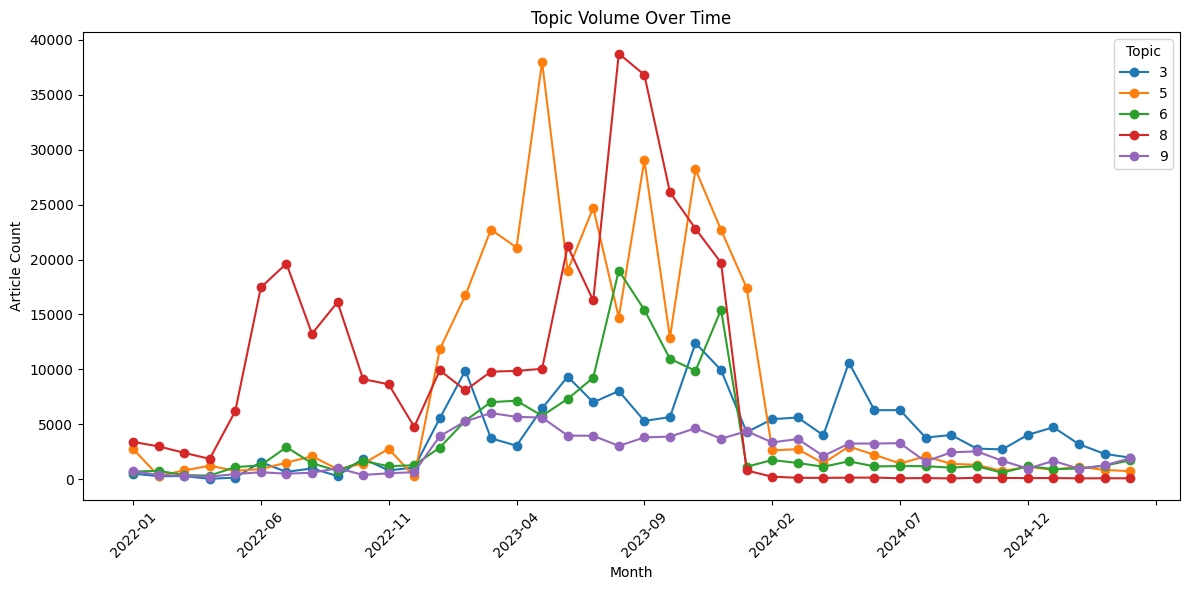

In [ ]:
# Get top 5 topics
top_topics = df['topic'].value_counts().head(5).index.tolist()

# Filter and group
filtered = df[df['topic'].isin(top_topics)]
volume = filtered.groupby(['yearmonth', 'topic']).size().unstack(fill_value=0)

# Plot
volume.plot(figsize=(12,6), marker='o')
plt.title('Topic Volume Over Time')
plt.ylabel('Article Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Topic')
plt.tight_layout()
plt.show()


#4️⃣ AI Adoption Potential vs Sentiment Trust Matrix
### X-axis: Frequency
### Y-axis: Avg Sentiment
### Each point = Suggested Industry

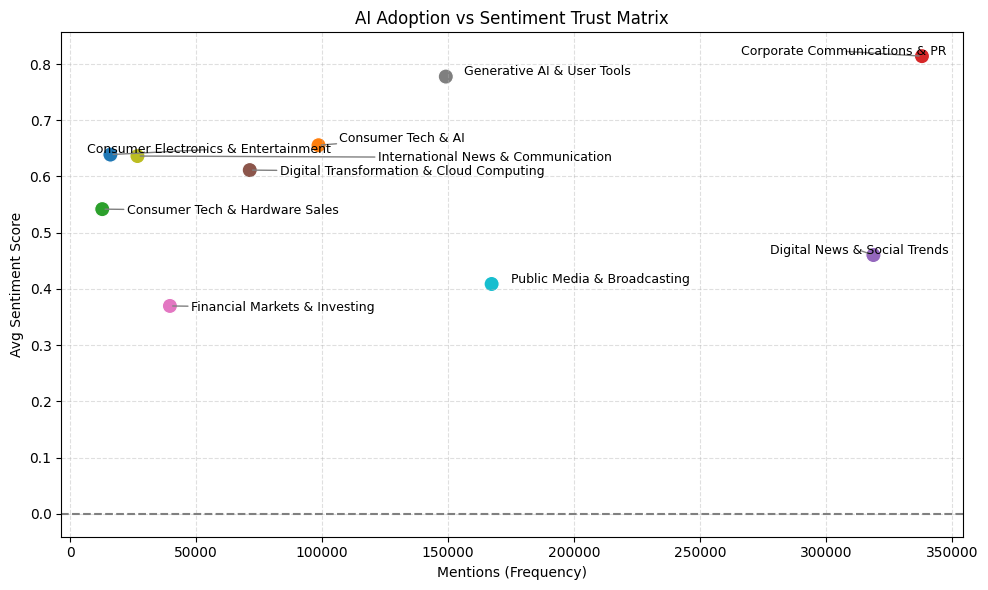

In [ ]:
from adjustText import adjust_text

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=industry_stats,
    x='frequency',
    y='avg_sentiment',
    hue='Suggested Industry',
    s=120,
    palette='tab10',
    legend=False
)

# Generate label objects
texts = []
for i, row in industry_stats.iterrows():
    texts.append(plt.text(row['frequency'], row['avg_sentiment'], row['Suggested Industry'], fontsize=9))

# Adjust labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# Add gridlines and baseline
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.4)

plt.title('AI Adoption vs Sentiment Trust Matrix')
plt.xlabel('Mentions (Frequency)')
plt.ylabel('Avg Sentiment Score')
plt.tight_layout()
plt.show()
